In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [41]:
def normalizeCol(vals):
    vals = vals.values.reshape((-1,1))
    scaler = MinMaxScaler()
    return scaler.fit_transform(vals)

In [55]:
#f1 = pd.read_csv('/home/tbrownex/data/retirement/funds/clean/NUSI.csv')
f1 = pd.read_csv('/home/tbrownex/data/retirement/funds/clean/RYLD.csv')
spx = pd.read_csv('/home/tbrownex/data/retirement/benchmark/SPX.csv')

In [56]:
spx.rename(columns={'close':'SPX'}, inplace=True)

In [57]:
f1['close'] = normalizeCol(f1['close'])
spx['SPX'] = normalizeCol(spx['SPX'])

In [58]:
key = 'date'
f1.set_index(key, inplace=True)
spx.set_index(key, inplace=True)

j = f1.join(spx, how='inner')
#j.reset_index(inplace=True)

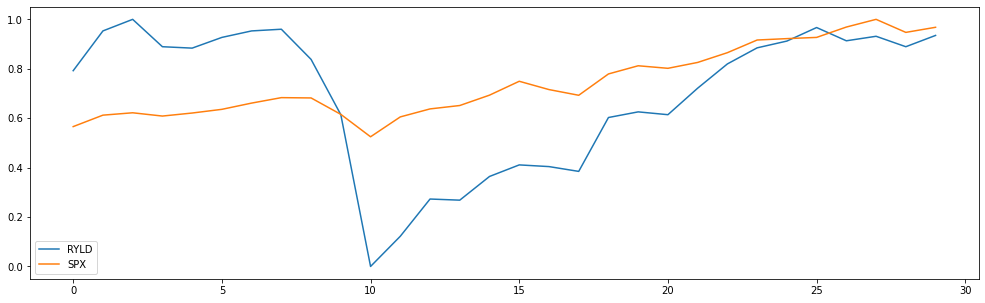

In [59]:
plt.figure(figsize=(17,5))
plt.plot(j['close'].values, label='RYLD')
plt.plot(j['SPX'].values, label='SPX')
plt.legend()
plt.show()
plt.close()

In [60]:
j.corr()

,close,SPX
close,1.000000,0.416574
SPX,0.416574,1.000000
